# Importing

In [1]:
import pandas as pd
data = pd.read_csv("/Users/mxdy/Documents/covidModel/complete.csv", index_col="Date") #to load the dataset

In [2]:
data.head(1000) #prints top 1000

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-04-16,Jammu and Kashmir,33.7782,76.5762,300.0,4,36.0,22,0,6
2020-04-16,Jharkhand,23.6102,85.2799,28.0,2,0.0,1,0,0
2020-04-16,Karnataka,15.3173,75.7139,279.0,12,80.0,19,0,9


# Cleaning

In [3]:
count_null=data.apply(pd.isnull).sum()        # finds the sum of all null values
shape=data.shape # tells the total rows and column of the data set
percentage=count_null/shape[0]
print(count_null)

Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64


In [4]:
percentage  #this data is phenominally withouthout even drinking

Name of State / UT           0.0
Latitude                     0.0
Longitude                    0.0
Total Confirmed cases        0.0
Death                        0.0
Cured/Discharged/Migrated    0.0
New cases                    0.0
New deaths                   0.0
New recovered                0.0
dtype: float64

# Pre - Processing 

In [5]:
# choosing only the required columns 
clean_data = pd.read_csv("/Users/mxdy/Documents/covidModel/complete.csv",usecols=[0,1,4,5,6])
print(clean_data)

            Date Name of State / UT  Total Confirmed cases Death  \
0     2020-01-30             Kerala                    1.0     0   
1     2020-01-31             Kerala                    1.0     0   
2     2020-02-01             Kerala                    2.0     0   
3     2020-02-02             Kerala                    3.0     0   
4     2020-02-03             Kerala                    3.0     0   
...          ...                ...                    ...   ...   
4687  2020-08-06          Telangana                73050.0   589   
4688  2020-08-06            Tripura                 5725.0    31   
4689  2020-08-06      Uttar Pradesh               104388.0  1857   
4690  2020-08-06        Uttarakhand                 8254.0    98   
4691  2020-08-06        West Bengal                83800.0  1846   

      Cured/Discharged/Migrated  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4            

In [6]:
clean_data.columns="date","state","confirmed","death","cured"

In [7]:
clean_data

,date,state,confirmed,death,cured
0,2020-01-30,Kerala,1.0,0,0.0
1,2020-01-31,Kerala,1.0,0,0.0
2,2020-02-01,Kerala,2.0,0,0.0
3,2020-02-02,Kerala,3.0,0,0.0
4,2020-02-03,Kerala,3.0,0,0.0
...,...,...,...,...,...
4687,2020-08-06,Telangana,73050.0,589,52103.0
4688,2020-08-06,Tripura,5725.0,31,3793.0
4689,2020-08-06,Uttar Pradesh,104388.0,1857,60558.0
4690,2020-08-06,Uttarakhand,8254.0,98,5233.0


In [9]:
#data = data.ffill() #fills all the null values - it doesnot require this as this data doesn't contain any null value

In [8]:
data = clean_data
data.state.astype('string') #convert string to suitable data type

0              Kerala
1              Kerala
2              Kerala
3              Kerala
4              Kerala
            ...      
4687        Telangana
4688          Tripura
4689    Uttar Pradesh
4690      Uttarakhand
4691      West Bengal
Name: state, Length: 4692, dtype: string

In [10]:
data.dtypes #to know the data types

date          object
state         object
confirmed    float64
death         object
cured        float64
dtype: object

In [11]:
data.date

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
4687    2020-08-06
4688    2020-08-06
4689    2020-08-06
4690    2020-08-06
4691    2020-08-06
Name: date, Length: 4692, dtype: object

In [12]:
data.set_index("date") #setting the index of the table

,state,confirmed,death,cured
date,,,,
2020-01-30,Kerala,1.0,0,0.0
2020-01-31,Kerala,1.0,0,0.0
2020-02-01,Kerala,2.0,0,0.0
2020-02-02,Kerala,3.0,0,0.0
2020-02-03,Kerala,3.0,0,0.0
...,...,...,...,...
2020-08-06,Telangana,73050.0,589,52103.0
2020-08-06,Tripura,5725.0,31,3793.0
2020-08-06,Uttar Pradesh,104388.0,1857,60558.0


In [13]:
data.index=pd.to_datetime(data.date) #setting the data type of index in proper format 

In [14]:
data.index.year #we can do cool things like this now

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='date', length=4692)

In [15]:
data.index.year.value_counts().sort_index() #counts how many rows we have for each year and sorts them

2020    4692
Name: date, dtype: int64

In [17]:
data["death"]=pd.to_numeric(data["death"],errors='coerce') #converting to suitable datatype

In [21]:
#finding the total confirmed cases, death cases and recovered cases and append them to four lists
#calculating the total mortality rate which is death_sum/confirmed_sum cases

total_cases=[]
total_deaths=[]
total_cured=[]
mortality_rate=[]
for i in data.date:
    
    confirmed_sum=data.confirmed[i].sum()
    death_sum=data.death[i].sum()
    cured_sum=data.cured[i].sum()
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_cured.append(cured_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    

In [22]:
#to find out the number of times a state occurs
count=0
for i in range(4692):
    if data.iloc[i,1]=='Sikkim':
        count+=1
print(count)

71


In [23]:
 total_cases

[1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 37.0,
 37.0,
 37.0,
 37.0,
 37.0,
 37.0,
 37.0,
 37.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 56.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 84.0,
 111.0,
 

In [24]:
total_deaths

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

In [25]:
total_cured

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,


In [26]:
#convert in form of a numpy 2D array
import numpy as np
total_cured = np.array(total_cured).reshape(-1,1)
total_cases = np.array(total_cases).reshape(-1,1)
total_deaths =  np.array(total_deaths).reshape(-1,1)

In [27]:
total_cured

array([[      0.],
       [      0.],
       [      0.],
       ...,
       [1328336.],
       [1328336.],
       [1328336.]])

In [28]:
future_days=10
future_forecast = np.array([i for i in range(len (data.date)+future_days)]).reshape(-1,1)
adjust_dates=future_forecast[:-10]

In [29]:
future_forecast

array([[   0],
       [   1],
       [   2],
       ...,
       [4699],
       [4700],
       [4701]])

In [30]:
states=data["state"].unique() #take all the unique elemens of states

In [31]:
states

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

In [32]:
state_count=[]
for i in range(len(states)):
    c=0
    for j in range(data.shape[0]):
        if states[i]==data.state[j]:
            c=c+data.confirmed[j]
    state_count.append(c)   

In [33]:
dates=data['date'].unique()

In [34]:
conf_count=[]
death_count=[]
cured_count=[]
for i in range(len(dates)):
    c=0
    for j in range(data.shape[0]):
        if dates[i]==data.date[j]:
            c+=data.confirmed[j]
    conf_count.append(c)  
for i in range(len(dates)):
    c=0
    for j in range(data.shape[0]):
        if dates[i]==data.date[j]:
            c+=data.death[j]
    death_count.append(c)  
for i in range(len(dates)):
    c=0
    for j in range(data.shape[0]):
        if dates[i]==data.date[j]:
            c+=data.cured[j]
    cured_count.append(c)  


# Visualization

<AxesSubplot: xlabel='date'>

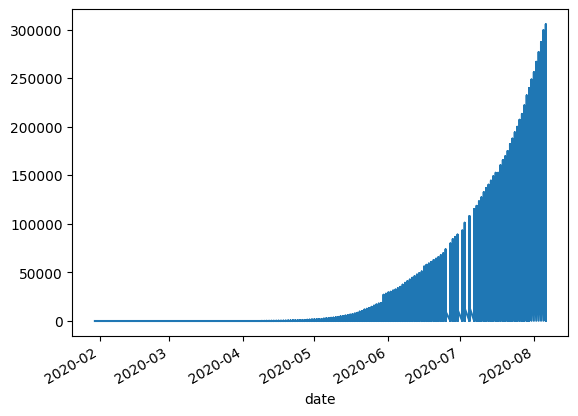

In [20]:
data["cured"].plot()

<AxesSubplot: xlabel='date'>

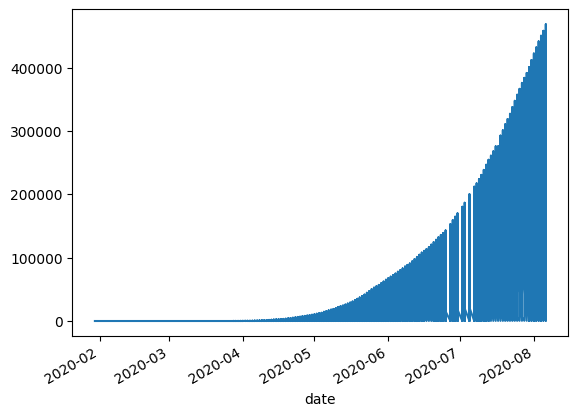

In [92]:
data["confirmed"].plot()

<AxesSubplot: xlabel='date'>

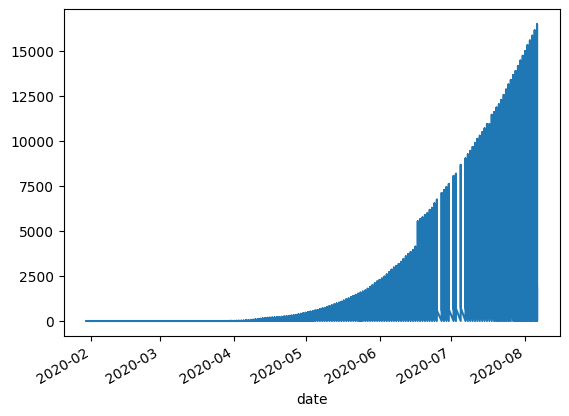

In [93]:
data["death"].plot()

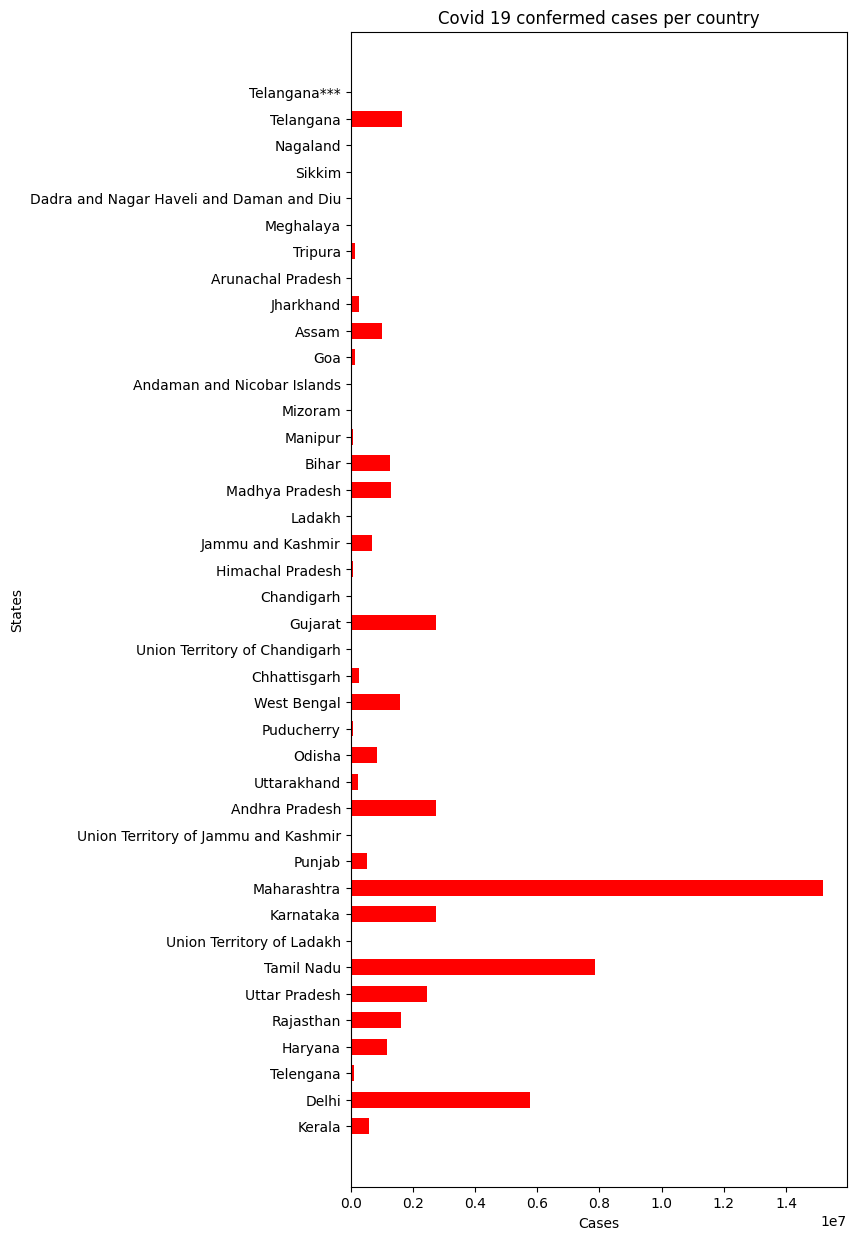

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(states)
y = np.array(state_count)

plt.figure().set_figheight(15)

plt.xlabel('Cases')
plt.ylabel('States')

plt.title("Covid 19 confermed cases per country")

plt.barh(x, y, color = "red", height = 0.6)
plt.show()

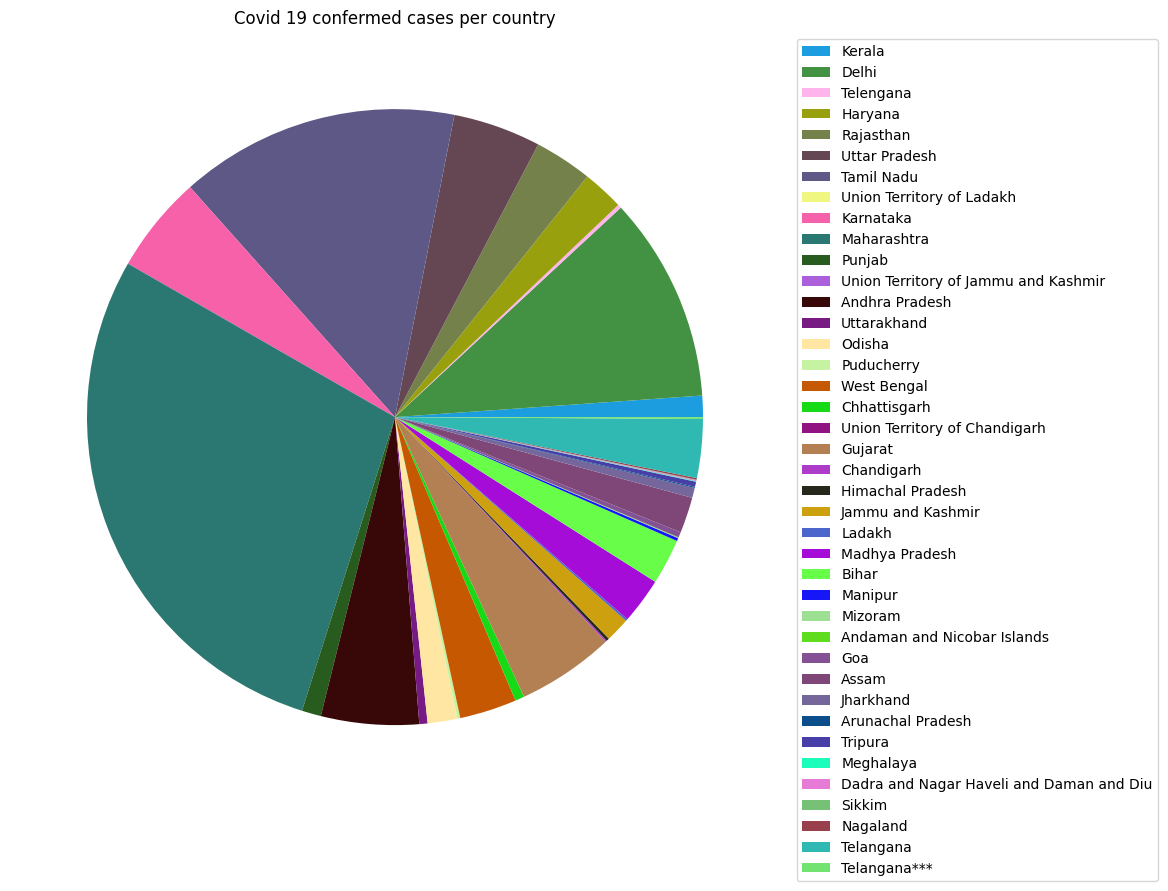

In [36]:
#pie chart
c=[]
import random
for j in range(len(states)):
    rand_colors = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    c.append(rand_colors)
plt.figure(figsize=(10,10))
plt.title("Covid 19 confermed cases per country")
plt.pie(state_count,colors=c)
plt.legend(states,loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
plt.show()


<AxesSubplot: title={'center': 'death cured and cases confirmed'}, xlabel='date'>

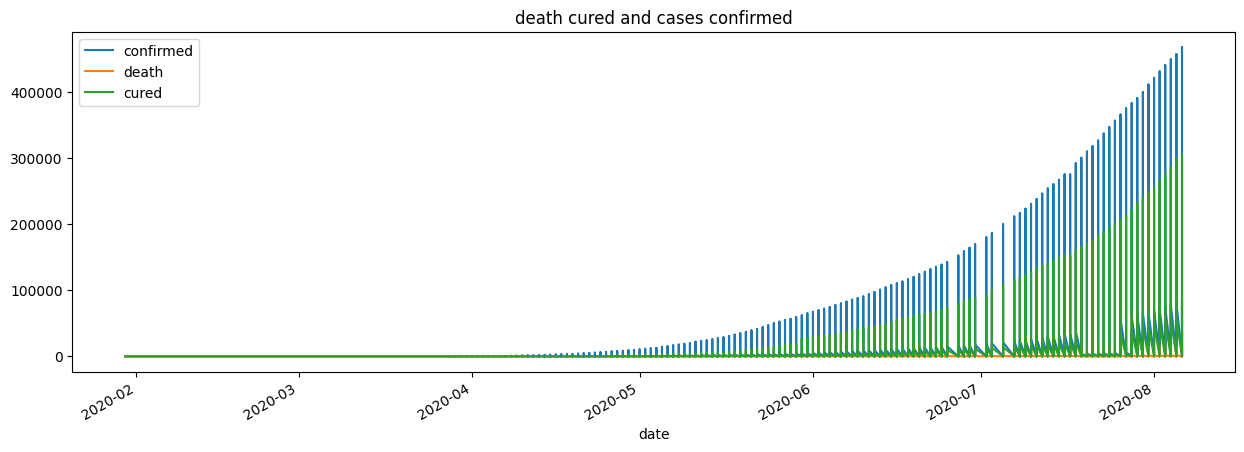

In [37]:
data.plot(kind='line',figsize=(15,5), title="death cured and cases confirmed")

In [38]:
dict={ 'Date':dates, 'Conf':conf_count,'death':death_count, 'cured':cured_count }
d=pd.DataFrame(dict)

conf_data = d[['Date','Conf']]
conf_data.columns=['ds','y']
death_data = d[['Date','death']]
death_data.columns=['ds','y']
cured_data = d[['Date','cured']]
cured_data.columns=['ds','y']
conf_data

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0
...,...,...
181,2020-08-02,1750723.0
182,2020-08-03,1803695.0
183,2020-08-04,1855745.0
184,2020-08-05,1908254.0


<AxesSubplot: >

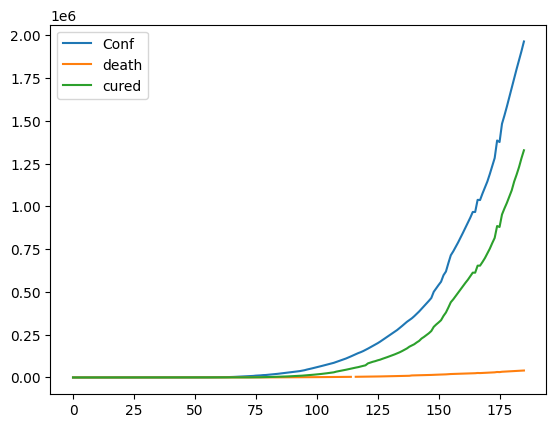

In [39]:
d.plot(kind='line')

# Model developement

In [86]:
conf_data

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0
...,...,...
181,2020-08-02,1750723.0
182,2020-08-03,1803695.0
183,2020-08-04,1855745.0
184,2020-08-05,1908254.0


In [87]:
from prophet import Prophet
m=Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(conf_data)

10:32:38 - cmdstanpy - INFO - Chain [1] start processing
10:32:38 - cmdstanpy - INFO - Chain [1] done processing


# Prediction

In [88]:
future=m.make_future_dataframe(periods=90,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-921.442036,-73840.237304,73783.699966,-921.442036,-921.442036,190.255489,190.255489,190.255489,-3960.95249,-3960.95249,-3960.95249,4151.207979,4151.207979,4151.207979,0.0,0.0,0.0,-731.186547
1,2020-01-31,-766.003582,-89974.847456,64397.101295,-766.003582,-766.003582,-11137.842289,-11137.842289,-11137.842289,-3960.95249,-3960.95249,-3960.95249,-7176.889798,-7176.889798,-7176.889798,0.0,0.0,0.0,-11903.845871
2,2020-02-01,-610.565128,-83675.682297,64539.340251,-610.565128,-610.565128,-4995.922755,-4995.922755,-4995.922755,-3960.95249,-3960.95249,-3960.95249,-1034.970265,-1034.970265,-1034.970265,0.0,0.0,0.0,-5606.487883
3,2020-02-02,-455.126675,-79605.386498,67981.193656,-455.126675,-455.126675,-4208.128232,-4208.128232,-4208.128232,-3960.95249,-3960.95249,-3960.95249,-247.175742,-247.175742,-247.175742,0.0,0.0,0.0,-4663.254907
4,2020-02-03,-299.688221,-77984.829779,70503.826461,-299.688221,-299.688221,-3510.876076,-3510.876076,-3510.876076,-3960.95249,-3960.95249,-3960.95249,450.076415,450.076415,450.076415,0.0,0.0,0.0,-3810.564296


In [89]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-30,-7.311865e+02
1,2020-01-31,-1.190385e+04
2,2020-02-01,-5.606488e+03
3,2020-02-02,-4.663255e+03
4,2020-02-03,-3.810564e+03
...,...,...
271,2020-10-31,4.566918e+06
272,2020-11-01,4.600454e+06
273,2020-11-02,4.633899e+06
274,2020-11-03,4.667776e+06


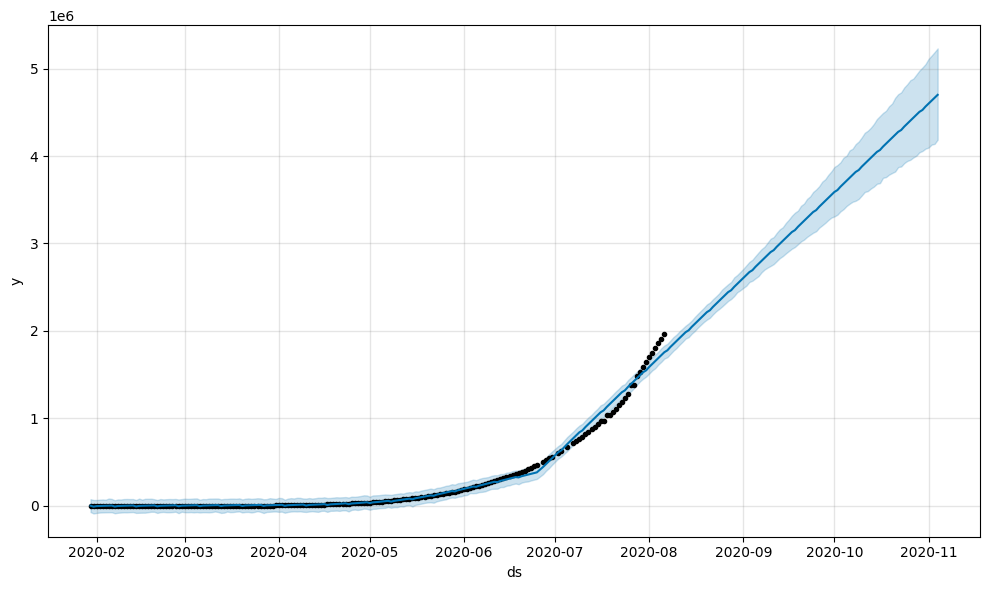

In [90]:
plot1=m.plot(forecast)

# Analysis

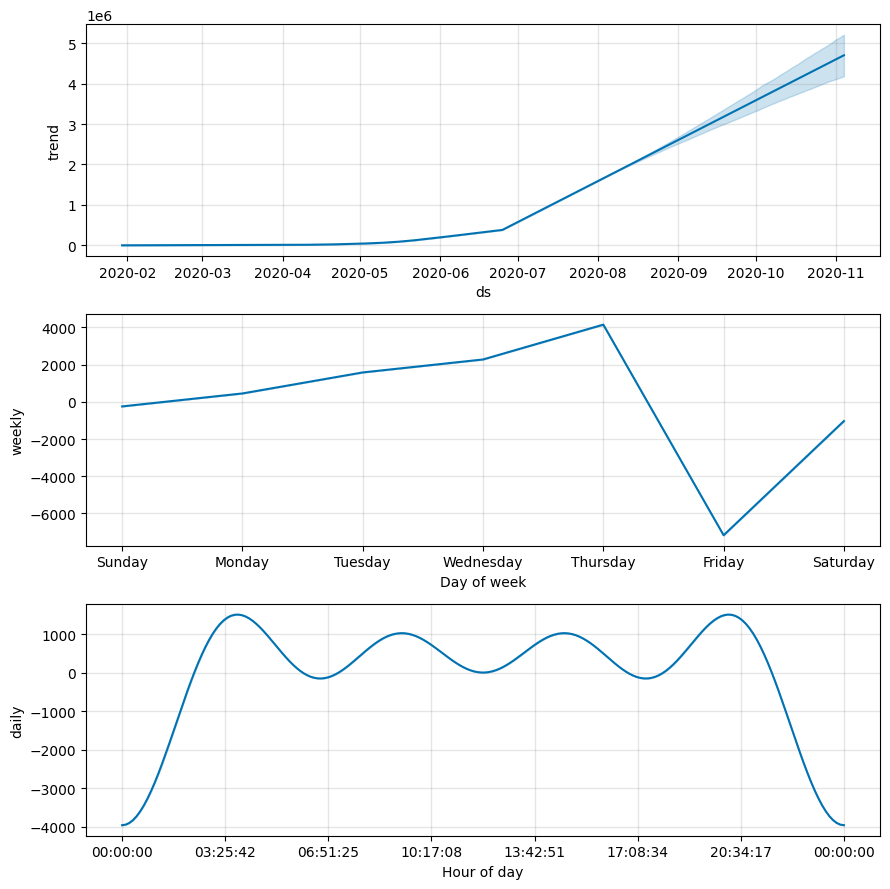

In [97]:
plot2=m.plot_components(forecast)